## Analysis and figure for user facing site
In this notebook, we charactize the ways that different github repository managers display their content to their users.

First, import necessary packages

In [1]:
from pywaffle import Waffle
import matplotlib.pyplot as plt
import pandas as pd

Read in CSV of data on user facing websites

In [5]:
user_facing = pd.read_csv('data/user_facing_site.csv', header=0)

Get the sum of each type of user facing website

In [6]:
user_facing_totals = user_facing.sum()
print(user_facing_totals)

organization_or_project_name    Darwin CoreEMLEcological Trait Data StandardMI...
only_github                                                                    11
github.io._website                                                              7
html_website                                                                   14
gitbook                                                                         0
dtype: object


Remove header since we'll be renaming this soon for plotting.

In [7]:
user_facing_new_labels = user_facing_totals.drop("organization_or_project_name")
user_facing_new_labels.head()

only_github           11
github.io._website     7
html_website          14
gitbook                0
dtype: object

Rename header and conver to data frame

In [8]:
user_facing_df = pd.DataFrame({'user_facing_site':user_facing_new_labels.index, 'count':user_facing_new_labels.values})
user_facing_df

,user_facing_site,count
0,only_github,11
1,github.io._website,7
2,html_website,14
3,gitbook,0


In order to make waffle plot, need to make dictionary using the data above.
I include code that takes counts from df above, and adds them to dictionary directly

In [9]:
user_facing_dict = {'HTML site':user_facing_df.iloc[2,1],'only GitHub':user_facing_df.iloc[0,1],'GitHub.io':user_facing_df.iloc[1,1]}

Make waffle plot. Specifying rows, legend, labels and color

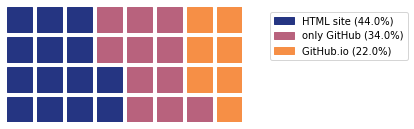

In [10]:
user_waffle = plt.figure(FigureClass=Waffle,
                        rows = 4,
                        values=user_facing_dict,
                        legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
                         labels=[f"{k} ({round((v/len(user_facing.index))*100,0)}%)" for k, v in user_facing_dict.items()],
                         colors=['#253582ff','#b8627dff','#f68f46ff']
)
plt.show()